<font size=18 weight='bold'>*~ plot orbits ~*</font>


In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
from astropy.cosmology import FlatLambdaCDM

from utils_orbs.orb_paths import SetupPaths
import utils_orbs.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()

imported h5py...
modules seem to have loaded?


In [2]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18,
                     "xtick.minor.top":True, "ytick.minor.right":True,
                     "xtick.minor.visible": True,
                     "ytick.minor.visible": True})

In [3]:
# defining color palette for plotting
palette = {"low":"olive", "high":"salmon", 
           "ex1":"tab:cyan", "ex2":"tab:purple",
           "lower":"#2C1D11", "upper":"#464646",
          }   
lw = {"lower":3,"upper":2}
        

In [6]:
f = h5py.File(f"{paths.path_data}hail-mary/orbitdata_40.hdf5",'r')
orbit = {}
for key, val in f.items():
    orbit[key] = np.array(val)
f.close()

f = h5py.File(f"{paths.path_data}hail-mary/snapshot_data.hdf5",'r')
convert = {}
for key, val in f.items():
    convert[key] = np.array(val)
f.close()

In [8]:
mergers = [941,45,55,131,611]
print(np.array(orbit['SubfindID1'][orbit['MergeFlag']==1][mergers],dtype='int32'))

likely_subind = [ 31,126,130] # 92, 112
print(np.array(orbit['SubfindID1'][orbit['MergeFlag']==0][likely_subind],dtype='int32'))

unbound_subind = [ 111,104 , 74,120, 58] # 94
print(np.array(orbit['SubfindID1'][orbit['MergeFlag']==0][unbound_subind],dtype='int32'))

[446120 277085 282026 309714 397340]
[320584 447958 464542]
[419008 412090 383035 431867 360801]


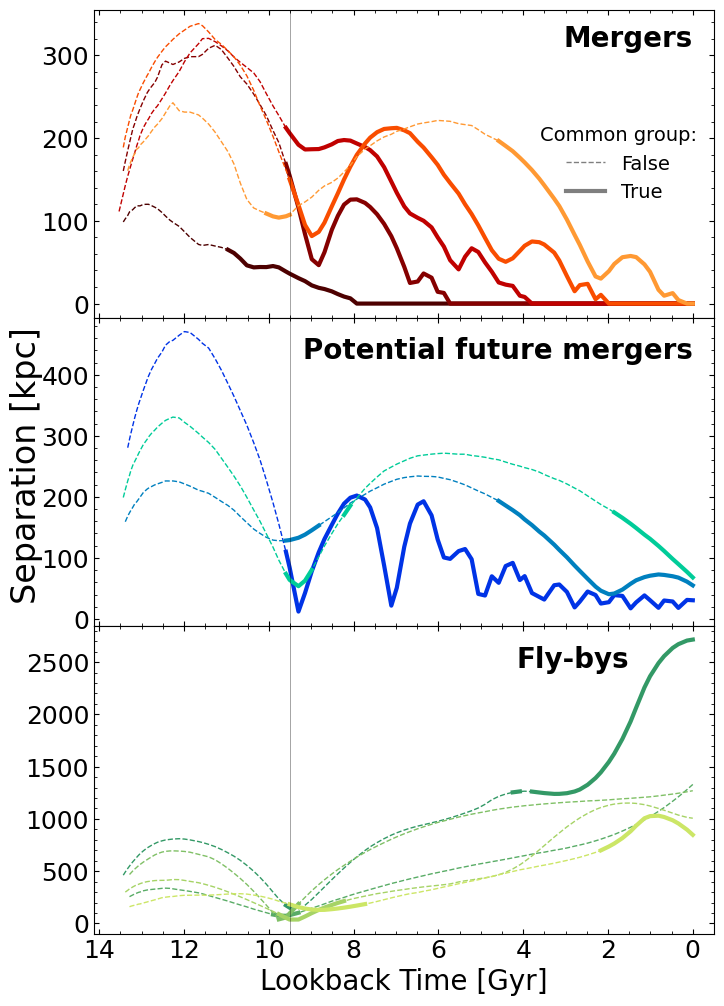

In [23]:
fig, ax = plt.subplots(3,1, figsize=(8,12), sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.0})

# note: switched these to be subfind ids instead of indices
mergers = [446120, 277085, 282026, 309714, 397340]
likely_subind = [320584, 447958, 464542] # 92, 112
unbound_subind = [419008, 412090, 383035, 431867, 360801] # 94
cmap_name = ["gist_heat","winter","summer"]

for plotnum, subfindids in enumerate([mergers,likely_subind,unbound_subind]):

    # corresponding indices of full table
    inds = [np.where(orbit['SubfindID1']==idd)[0][0] for idd in subfindids]

    # initialize colormaps 
    colorval = np.linspace(0.2,0.8,len(inds))
    cmap = plt.get_cmap(cmap_name[plotnum])

    for en, ind in enumerate(inds):
        # - nonnan - #
        nonnanmask = ~np.isnan(orbit['Separations'][ind])
        snaps = convert['Lookback Time'][nonnanmask]
        seps = orbit['Separations'][ind][nonnanmask]

        ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), linestyle='dashed', lw=1)            
#         ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), lw=2,label=subinds[en])    


        # - group true - #
        snaps = convert['Lookback Time']
        seps = np.where(orbit['GroupFlag'][ind], orbit['Separations'][ind],np.nan)

        ax[plotnum].plot(snaps, seps, color=cmap(colorval[en]), lw=3)#,label=subinds[en])    

# # plt.ylabel("Physical Separation [kpc]")
# # plt.xlabel("Lookback Time [Gyr]")
for i in range(3):
#     ax[i].legend(fontsize=10)
    ax[i].axvline(convert['Lookback Time'][convert['Snapshot']==40],color='black',lw=0.5,alpha=0.5)
fig.supylabel("Separation [kpc]")
# ax[1].text(snap['Lookback Time'][snap['Snapshot']==40]+0.15, 20,f"$z={snap['Redshift'][snap['Snapshot']==40][0]:.2f}$",alpha=0.5,ha='right')
# a[1].text(snap['Lookback Time'][snap['Snapshot']==40]-0.25, 1300,"$T_{LB}$"+f"$={snap['Lookback Time'][snap['Snapshot']==40][0]:.2f}$ Gyr",alpha=0.5)
xval = 0
# xval = (np.max(snap['Lookback Time']+0.5)+0.5)/2
ax[0].text(xval,320,"Mergers",ha='right',va='center',fontweight='semibold')
ax[1].text(xval,440,"Potential future mergers",ha='right',va='center',fontweight='semibold')
ax[2].text(xval+1.5,2450,"Fly-bys",ha='right',fontweight='semibold')
# ax[0].text(xval,300,"Mergers",ha='center',va='center')
# ax[1].text(xval,400,"Potential future mergers",ha='center',va='center')
# ax[2].text(xval,2350,"Fly-bys",ha='center')

ax[0].plot([0],[0],linestyle='dashed', lw=1,color='black',alpha=0.5,label='False')
ax[0].plot([0],[0],lw=3,color='black',alpha=0.5,label='True')
ax[0].legend(loc='center right',title="Common group:",fontsize=14,title_fontsize=14,frameon=False)
plt.xlim(np.max(convert['Lookback Time']+0.5),-0.5)
plt.xlabel("Lookback Time [Gyr]")
plt.savefig("../../plots/bet-on-it/5_exampleorbits.png")
plt.show()

In [24]:
convert['Lookback Time'][40]

9.509810862541364